# Lab-7: ANN in Pytorch

In this lab, you will practice simple deep learning model in Pytorch.


## Objectives:
1. Theoretical issues
2. Get starting in Pytorch
___

### Theoretical issues
Ordinary fully connected neural nets consists of Dense layers, activations, and output layer.

1. What's the difference between deep learning and normal machine learning?
<span style="color:blue"> 1- Adding more data for traditional ML algorithms, won't improve
	  the performance and the learning curve will saturate (plateau), but for DL, you can get better performance.
	<br/>2- There's no feature extraction step in a lot of cases like in CNN
	<br/>3- It need high computational power in training.
2. How does a neural network with no hidden layers and one output neuron compare to a logistic/linear regression?
<span style="color:blue"> There's no difference. NN with no hidden layers is perceptron which has the same architecture of logistic/linear regression. If the activation function in the output layer is linear and loss is mse then it is linear regression. If the activation function in the output layer is sigmoid and the loss is the logloss then it is logistic regression.
3. How does a neural network with multiple hidden layers but with linear activation and one output neuron compared to logistic/linear regression?
<span style="color:blue"> Also, there's no difference. Take as an example this image:
![alt text](https://ujwlkarn.files.wordpress.com/2016/08/screen-shot-2016-08-09-at-4-19-50-am.png?w=996&h=736)
Derive the output neuron in this simple network, given the activation function is this linear function: f(x) = x, You will find it is a linear combination of the input variables.
4. Can the perceptron find a non-linear decision boundary?
<span style="color:blue"> No, as long as the the logits (logOdds which is the input to the sigmoid function) is a linear combination of the input variables then it can only find a linear decision boundary.
5. In multi-hidden layers network, what's the need of non-linear activation function?
<span style="color:blue"> To capture the non linear patterns in the relation between the input and the output.
6. Is random weight assignment better than assigning same weights to the units in the hidden layer.
<span style="color:blue"> Yes, as assigning the same weight to the unit won't learn anything from the error signal propagated from the output layer as the error signal value depends on the value of the weight itels, so the hidden layer before the output layer all of the units will get the same value of the error and they will change to the same value as well and same for all units in the network.
---

## Pytorch: Getting started 

### Feed Forward Neural Network
An artificial neural network wherein connections between the nodes do not form a cycle.
It consists of : 

- Input Layer  
- Hidden Layer(s)
- Output Layer

![alt text](https://images.deepai.org/django-summernote/2019-06-06/5c17d9c2-0ad4-474c-be8d-d6ae9b094e74.png)


The neural network contents units, typically called "neurons".  Each unit has some number of weighted inputs. These weighted inputs are summed together (a linear combination) then passed through an activation function to get the unit's output.

<center>
<img src="./assets/simple_neuron.png" alt="drawing" style="width:400px;"/> 
</center>

Mathematically this equivalent to:
<center>

$ 
 y = f(w_1x_1 + w_2x_2 + b)
$

$ 
 y = f\left(\sum_{i=1}^{N} w_ix_i + b\right)
$

</center>


### Tensors

It turns out neural network computations are just a bunch of linear algebra operations on tensors, a generalization of matrices. A vector is a 1-dimensional tensor, a matrix is a 2-dimensional tensor, an array with three indices is a 3-dimensional tensor (RGB color images for example). The fundamental data structure for neural networks are tensors and PyTorch (as well as pretty much every other deep learning framework) is built around tensors.
 

<img src="./assets/tensor_examples.svg" width="600px">

Just like Numpy arrays, Pytorch tensors can be added, multiplied, subtracted, etc.

#### A simple neuron with tensors

In [24]:
import torch 

def activation(x):
    """ Sigmoid activation function 
    
        Arguments
        ---------
        x: torch.Tensor
    """
    return 1/(1+torch.exp(-x))

We generate data we need to compute the output of the neuron. We have `5` input features, just random for now. 

In [25]:
### Generate some data
torch.manual_seed(7) # Set the random seed so things are predictable

# Features are 5 random normal variables
features = torch.randn((1, 5))

# True weights for our data, random normal variables again
weights = torch.randn_like(features)

# and a true bias term
bias = torch.randn((1, 1))

> **Task**: Calculate the output of the network with input features `features`, weights `weights`, and bias `bias`. Similar to Numpy, PyTorch has a [`torch.sum()`](https://pytorch.org/docs/stable/torch.html#torch.sum) function, as well as a `.sum()` method on tensors, for taking sums. Use the function `activation` defined above as the activation function.

In [26]:
# Compute the output here
y = activation(torch.sum(features * weights) + bias)
y

tensor([[0.1595]])

You can do the multiplication and sum in the same operation using a matrix multiplication. In general, you'll want to use matrix multiplications since they are more efficient and accelerated using modern libraries and high-performance computing on GPUs.

We can perform the same operation using matrice multiplication. Useuse [`torch.mm()`](https://pytorch.org/docs/stable/torch.html#torch.mm) or [`torch.matmul()`](https://pytorch.org/docs/stable/torch.html#torch.matmul) which is somewhat more complicated and supports broadcasting. If we try to do it with `features` and `weights` as they are.

**Note** When doing matrice multiplication consider reshaping matrix in correct shape to avoid error. 

There are a few options here: [`weights.reshape()`](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.reshape), [`weights.resize_()`](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.resize_), and [`weights.view()`](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.view).

* `weights.reshape(a, b)` will return a new tensor with the same data as `weights` with size `(a, b)` sometimes, and sometimes a clone, as in it copies the data to another part of memory.
* `weights.resize_(a, b)` returns the same tensor with a different shape. However, if the new shape results in fewer elements than the original tensor, some elements will be removed from the tensor (but not from memory). If the new shape results in more elements than the original tensor, new elements will be uninitialized in memory. Here I should note that the underscore at the end of the method denotes that this method is performed **in-place**. Here is a great forum thread to [read more about in-place operations](https://discuss.pytorch.org/t/what-is-in-place-operation/16244) in PyTorch.
* `weights.view(a, b)` will return a new tensor with the same data as `weights` with size `(a, b)`.

> **Task**:  Compute the output of the single unit network using matrix multiplicatiom

In [27]:
# Your solution here
y = activation(torch.mm(features, weights.view(5,1)) + bias)
y

tensor([[0.1595]])

### Multi layer network

We saw how to compute the output of single unit network. The power of neural networks come when multiple units into layers. 
The output of one layer of neurons becomes the input for the next layer. With multiple input units and output units, we now need to express the weights as a matrix.

<img src='./assets/multilayer_diagram_weights.png' width=450px>

The first layer shown on the bottom here are the inputs, understandably called the **input layer**. The middle layer is called the **hidden layer**, and the final layer (on the right) is the **output layer**. We can express this network mathematically with matrices again and use matrix multiplication to get linear combinations for each unit in one operation. For example, the hidden layer ($h_1$ and $h_2$ here) can be calculated 

$$
\vec{h} = [h_1 \, h_2] = 
\begin{bmatrix}
x_1 \, x_2 \cdots \, x_n
\end{bmatrix}
\cdot 
\begin{bmatrix}
           w_{11} & w_{12} \\
           w_{21} &w_{22} \\
           \vdots &\vdots \\
           w_{n1} &w_{n2}
\end{bmatrix}
$$

The output for this small network is found by treating the hidden layer as inputs for the output unit. The network output is expressed simply

$$
y =  f_2 \! \left(\, f_1 \! \left(\vec{x} \, \mathbf{W_1}\right) \mathbf{W_2} \right)
$$ 

In [28]:
### Generate some data
torch.manual_seed(7) # Set the random seed so things are predictable

# Features are 3 random normal variables
features = torch.randn((1, 3))

# Define the size of each layer in our network
n_input = features.shape[1]     # Number of input units, must match number of input features
n_hidden = 2                    # Number of hidden units 
n_output = 1                    # Number of output units

# Weights for inputs to hidden layer
W1 = torch.randn(n_input, n_hidden)
# Weights for hidden layer to output layer
W2 = torch.randn(n_hidden, n_output)

# and bias terms for hidden and output layers
B1 = torch.randn((1, n_hidden))
B2 = torch.randn((1, n_output))

> **Task:** Calculate and print the output for this multi-layer network using the weights `W1` & `W2`, and the biases, `B1` & `B2`. The correct value should be `tensor([[0.3171]])` 

In [29]:
### Solution

h = activation(torch.mm(features, W1) + B1)
output = activation(torch.mm(h, W2) + B2)
print(output)

tensor([[0.3171]])


### Pytorch Autograd

Automatic differentiation package : **No need to worry about back propagation partial derivatives and chain rule** 

Tensors track their computational history and support gradient computation

`requires_grad=True` : Tells PyTorch that we want to compute gradients for the specific tensor

In [30]:
x = torch.tensor(5.0, requires_grad=True)
print(x.grad) # no gradient at the initialization

None


The `backward()` function is responsible for calculation of gradients and accumulate (not apply) them in respective tensors

The tensor with `requires_grad=True`: has attribute to check the gradients values : `grad`

Let's consider a function of x. 
$f(x) = x^2 + 2x + 1$


>**Question** what is the gradient at the point $x=5$

**the derivate of $f$ is $f'(x) = 2x + 2$. for $x=5$ the gradient is 12**

The following code will compute and accumulate the gradient w.r.t $x$

In [31]:
# we compute some function f(x) = x^2 + 2x + 1
z = x ** 2 + 2*x + 1

print(z, z.requires_grad)

z.backward() # compute and propagate the gradient

print(x.grad)

tensor(36., grad_fn=<AddBackward0>) True
tensor(12.)


Run the previous cell several time and see how the value of the gradient changes

**Note**: Because the gradient is accumulated everytime you call `backward()` it is important to zero the accumulated values before any calculations, i.e., `x.grad = None` or `zero_grad()` for optimizers.



To stop PyTorch from tracking the history and forming the backward graph, the code can be wrapped inside with torch.no_grad(): It will make the code run faster whenever gradient tracking is not needed. 

In [32]:
with torch.no_grad():
    # we compute some function f(x) = x^2 + 2x + 1
    z = x ** 2 + 2*x + 1

    print(z, z.requires_grad)

    # z.backward()  will trigger an eoor no gradient is tracked

tensor(36.) False


Backward graph is created automatically and dynamically by autograd class during forward pass. Backward() simply calculates the gradients by passing its argument to the already made backward graph.

In [33]:
x = torch.tensor([1.0, 2.0, 10.0], requires_grad = True)
y = torch.tensor([0.0, 5.0, 3], requires_grad = True)

z = x * y

z.backward(torch.tensor([1.0, 1.0, 1.0])) # compute the gradient usinng an external gradient
print("Gradient w.r.t x = ", x.grad)
print("Gradient w.r.t y = ", y.grad)

Gradient w.r.t x =  tensor([0., 5., 3.])
Gradient w.r.t y =  tensor([ 1.,  2., 10.])


### Tensor to numpy array and vice-versa

PyTorch has a great feature for converting between Numpy arrays and Torch tensors. To create a tensor from a Numpy array, use `torch.from_numpy()`. To convert a tensor to a Numpy array, use the `.numpy()` method.

In [34]:
import numpy as np
a = np.random.rand(4,3)
a

array([[0.51380853, 0.98588048, 0.79321233],
       [0.17281425, 0.88647339, 0.9228533 ],
       [0.82934223, 0.20525904, 0.86651418],
       [0.14288894, 0.74958566, 0.7688467 ]])

In [35]:
b = torch.from_numpy(a)
b

tensor([[0.5138, 0.9859, 0.7932],
        [0.1728, 0.8865, 0.9229],
        [0.8293, 0.2053, 0.8665],
        [0.1429, 0.7496, 0.7688]], dtype=torch.float64)

In [36]:
b.numpy()

array([[0.51380853, 0.98588048, 0.79321233],
       [0.17281425, 0.88647339, 0.9228533 ],
       [0.82934223, 0.20525904, 0.86651418],
       [0.14288894, 0.74958566, 0.7688467 ]])


## Model Design in Pytorch
Now we're going to build a larger network that can solve a (formerly) difficult problem, identifying text in an image. Here we'll use the MNIST dataset which consists of greyscale handwritten digits. Each image is 28x28 pixels, you can see a sample below.:
 
<img src="./assets/mnist.png" width="500px"> 

Our goal is to build a neural network that can take one of these images and predict the digit in the image.

we have three simple parts that we need to build:
1. Data Loading process.
2. Model building.
3. the training loops.

### 1. Data Loading

Data Loading in pytorch is very easy and broken into 3 steps:
1. Data Source.
2. Data Transformations.
3. Data Loader.



#### Loading data

Pytorch uses data loading utility which is called `DataLoader` that supports:
automatic batching, transformation, single- and multi-process data loading and more..

In [37]:
from torchvision import datasets, transforms
from torch. utils.data import DataLoader

batch_size = 32
test_batch_size = 100

data_transformations = transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,))
                       ])

mnist_train = datasets.MNIST('../data', train=True, download=True,
                       transform=data_transformations)
mnist_test = datasets.MNIST('../data', train=False,
                            transform=data_transformations)

train_loader = DataLoader(mnist_train,
                          batch_size=batch_size, shuffle=True)
test_loader = DataLoader(mnist_test,
                         batch_size=test_batch_size, shuffle=True)

Label= tensor(5)


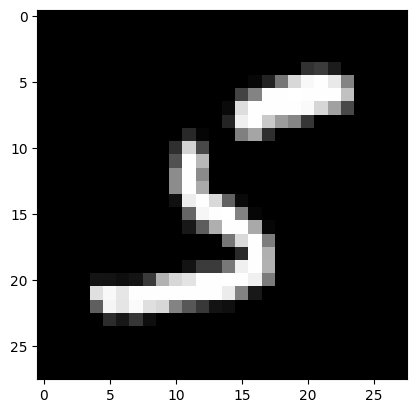

In [42]:
import matplotlib.pyplot as plt
images, labels = next(iter(train_loader))

print('Label=', labels[0])
plt.imshow(images[0].reshape(28,28), cmap="gray")

First, let's try to build a simple network for this dataset using weight matrices and matrix multiplications. Then, we'll see how to do it using PyTorch's `nn` module which provides a much more convenient and powerful method for defining network architectures.

We will create fully connected layers (Each unit in one layer is connected to each unit in the next layer) with following architecture:

- Input layer of size `784 = 28x28`: this correspond to the *flattening* of the input image, i.e., tranform the 2D images into 1D vectors. Having batch size of `32`, the input size will be `(32, 784)` 
- Two hidden layers with 256 and 100 units
- Output layer with 10 units corresponding to number of classes

> **Task**: Flatten the batch of images images. Then build a multi-layer network with 784 input units, 100 hidden units, 100 hidden units, and 10 output units using random tensors for the weights and biases. For now, use a sigmoid activation for the hidden layer. Leave the output layer without an activation, we'll add one that gives us a probability distribution next.


In [17]:
## Solution
def activation(x):
    return 1/(1+torch.exp(-x))

# Flatten the input images
inputs = images.view(images.shape[0], -1)

# Create parameters with random initialization
w1 = torch.randn(784, 256)
b1 = torch.randn(256)

w2 = torch.randn(256, 100)
b2 = torch.randn(100)

w3 = torch.randn(100, 10)
b3 = torch.randn(10)

# Write the code to compute the output of network from the image inputs
h1 = activation(torch.mm(inputs, w1) + b1)

h2 = activation(torch.mm(h1, w2) + b2)

out = activation(torch.mm(h2, w3) + b3)

out.shape

torch.Size([32, 10])

Now we have 10 outputs for our network. We want to pass in an image to our network and get out a probability distribution over the classes that tells us the likely class(es) the image belongs to. Something that looks like this: 

<image src="./assets/image_distribution.png" width="400px">

Here we see that the probability for each class is roughly the same. This is representing an untrained network, it hasn't seen any data yet so it just returns a uniform distribution with equal probabilities for each class.

To calculate this probability distribution, we often use the softmax function. Mathematically this looks like:


#### $\sigma(x_i) = \dfrac{e^{x_i}}{\sum_{j=1}^{K}e^{x_j}}$


What this does is squish each input between 0 and 1 and normalizes the values to give you a proper probability distribution where the probabilites sum up to one.

**Task**: Implement a function softmax that performs the softmax calculation and returns probability distributions for each example in the batch. Note that you'll need to pay attention to the shapes when doing this. If you have a tensor `a` with shape `(32, 10)` and a tensor `b` with shape `(32,)`, doing `a/b` will give you an error because PyTorch will try to do the division across the columns (called broadcasting) but you'll get a size mismatch. The way to think about this is for each of the 32 examples, you only want to divide by one value, the sum in the denominator. So you need b to have a shape of `(32, 1)`. This way PyTorch will divide the 10 values in each row of a by the one value in each row of b. Pay attention to how you take the sum as well. You'll need to define the dim keyword in torch.sum. Setting dim=0 takes the sum across the rows while `dim=1` takes the sum across the columns.

In [18]:
## Solution
def softmax(x):
    # return the softmax
    return torch.exp(x)/torch.sum(torch.exp(x), dim=1).view(-1, 1)

probabilities = softmax(out)

# Does it have the right shape? Should be (64, 10)
print(probabilities.shape)
# Does it sum to 1?
print(probabilities.sum(dim=1))

torch.Size([32, 10])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000])


#### Model building

PyTorch provides a module `nn` that makes building networks much simpler. Here I'll show you how to build the same one as above with 784 inputs, 256 hidden units,  100 hidden units,, 10 output units and a softmax output.

1. Defining components: <br/>
This step is done in the constructor, where you will define the layers that will be used accordingly in the next step.
2. Network flow: <br/>
This step is done in the forward function. Where you will get the input batch as an argument then you will use the defined layers in the previous step to define the flow of the network then you will return the output batch.


Pytorch is a dynamic framework, where you can use primitive python keywords with it.
You can use if and while statements. Also, it can accepts and returns more than one batch.

In [19]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.hidden1 = nn.Linear(28*28, 256)        
        # Write 2 lines to define 2 more linear layers.
        # 1 hidden layers with number of neurons numbers: 250 and 100
        # 1 output layer that should output 10 neurons, one for each class.
        self.hidden2 = nn.Linear(256, 100) 
        self.output = nn.Linear(100, 10) 


    def forward(self, x):
        # the linear layers fc1, fc2, fc3, and fc4
        # accepts only flattened input (1D batches)
        # while the batch x is of size (batch, 28 * 28)
        # define one line to flatten the x to be of size (batch_sz, 28 * 28)
        x = x.view(-1, 28*28)
        x = F.relu(self.hidden1(x))
        x = F.relu(self.hidden2(x))
        x = self.output(x)
        return F.log_softmax(x, dim=1)

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net().to(device)

print(model)

Net(
  (hidden1): Linear(in_features=784, out_features=256, bias=True)
  (hidden2): Linear(in_features=256, out_features=100, bias=True)
  (output): Linear(in_features=100, out_features=10, bias=True)
)


### Training loops
After that we should define the loops over tha batches and run the training on.

In [20]:
epochs = 10
lr = 0.01
momentum = 0.5
log_interval = 10

criterion = nn.NLLLoss() # negative log loss

In [21]:
def train( model, device, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                       100. * batch_idx / len(train_loader), loss.item()))

In [22]:
def test( model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            # Do the same that was done in the previous function.
            # But without backprobagating the loss and without running the optimizers
            # As this function is only for test.
            # write 3 lines to transform the data to the device, get the output and compute the loss
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\rTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [23]:
import torch.optim as optim

optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum)


for epoch in range(1, epochs + 1):
    train(model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader)

torch.save(model.state_dict(), "mnist_model.pt")



Train Epoch: 1 [0/60000 (0%)]	Loss: 2.314716
Train Epoch: 1 [320/60000 (1%)]	Loss: 2.294615
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.200132
Train Epoch: 1 [960/60000 (2%)]	Loss: 2.117995
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.047817
Train Epoch: 1 [1600/60000 (3%)]	Loss: 1.972666
Train Epoch: 1 [1920/60000 (3%)]	Loss: 1.803920
Train Epoch: 1 [2240/60000 (4%)]	Loss: 1.646397
Train Epoch: 1 [2560/60000 (4%)]	Loss: 1.442107
Train Epoch: 1 [2880/60000 (5%)]	Loss: 1.394910
Train Epoch: 1 [3200/60000 (5%)]	Loss: 1.128933
Train Epoch: 1 [3520/60000 (6%)]	Loss: 1.220533
Train Epoch: 1 [3840/60000 (6%)]	Loss: 1.089290
Train Epoch: 1 [4160/60000 (7%)]	Loss: 1.013167
Train Epoch: 1 [4480/60000 (7%)]	Loss: 0.820810
Train Epoch: 1 [4800/60000 (8%)]	Loss: 0.626434
Train Epoch: 1 [5120/60000 (9%)]	Loss: 0.849811
Train Epoch: 1 [5440/60000 (9%)]	Loss: 0.699650
Train Epoch: 1 [5760/60000 (10%)]	Loss: 0.713503
Train Epoch: 1 [6080/60000 (10%)]	Loss: 0.597469
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.62

KeyboardInterrupt: 

> **Question**: How to check if the neural network model is overfitting?v

<span style="color:blue"> Track the training and the testing losses during the training, if the loss on test set starts increasing then the model is overfitting